# __Welcome to the notebook!__
This notebook takes you through the various steps we went through for this data mining project. Here, you will have a detailed look at the logic as well as the actyual code behind each data mining concept we applied so as to achieve our conclusion.
#### __Notebook Outline__:
<ol type="I">
<b>
<li>Theme Description</li>
<li>Dataset Overview</li>
<li>Data Exploration and Preprocessing</li>
<li>Data Mining Techniques</li>
<li>Model Building</li>
<li>Analysis and Evaluation</li>
<li>Conclusion</li>
</b>
</ol>

## <div id="I" >__I. Theme Description__</div>
Our theme of choice is `Data Mining in Medical Field`

####
<u>__Objective__:</u>
Build a **classification model to predict service request for different types of patients.**

## __II. Dataset Overview__
This dataset represents a health profile of individuals, capturing a variety of demographic information, geographical data, medical history, and current health status. It is designed to facilitate the understanding of patients' health needs and identify potential necessary urgent interventions.

This dataset could be used for a wide range of purposes, including epidemiological studies, healthcare service planning, and personalized patient care management. Each row represent a unique patient, with their respective health and demographic data.
<br><br>
<u>__Source:__</u>
The data was collected during the academic year 2021/2022, during the peak of the covid-19 epidemic so as to make __home hospitalization__ a valid possibility in order to reduce the massive load on hospitals during the pandemic. It was collected by former students from the __University of Constantine 2 Abdelhamid Mehri__, in collaboration with the medical staff of __University Hospital (CHU) Abdelhamid Ben Badis__ in Constantine.

## __III. Data Exploration and Preprocessing__

First of all, let's start with importing the necessary python libraries as well as the dataset itself:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import the dataset
df = pd.read_csv('dataset/dataset.csv')

""" 
for running from google colab

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('./dataset.csv')
 """

" \nfor running from google colab\n\nfrom google.colab import files\nuploaded = files.upload()\ndf = pd.read_csv('./dataset.csv')\n "

In [2]:
# print shape and header
print(f"The dataset consists of {df.shape[0]} rows, {df.shape[1]} columns.")
df.head()

The dataset consists of 800 rows, 27 columns.


,ID,Age,Gender,Service Time,Latitude,Longitude,Diabetes,Hypertension,Heart disease,Cancer,...,Blood pressure,Heart rate,Body temperature,Oxygen saturation,Pain level,Medication adherence,WBC,RBC,Platelet Count,Service request
0,1,69,F,25,36.326607,6.583345,No,Medium,No,No,...,138,78,35.6,91,0,High,5322,4085975,236534,Nursing care
1,2,53,F,20,36.328921,6.627832,No,Medium,No,No,...,131,70,38.7,98,1,High,16876,4988389,475014,general medicine
2,3,67,M,25,36.331728,6.575438,Yes,No,No,No,...,118,55,36.7,95,0,High,8962,4926610,280074,internal medicine
3,4,50,F,20,36.382200,6.612659,No,Medium,No,No,...,135,82,37.2,87,1,High,6535,4649583,280729,Nursing care
4,5,73,M,15,36.286557,6.605086,No,No,No,No,...,113,59,36.3,99,1,High,5550,4500926,206813,Nursing care


We can see that the dataset has **27 columns**. This is a clear indicator that we may need to apply some dimentionality reduction in the future.
Those columns are:

In [3]:
df.columns

Index(['ID', 'Age', 'Gender', 'Service Time', 'Latitude', 'Longitude',
       'Diabetes', 'Hypertension', 'Heart disease', 'Cancer',
       'Chronic obstructive pulmonary disease', 'Kidney disease',
       'Glucose level', 'CRP', 'PT', 'Cholesterol level', 'Triglyceride level',
       'Blood pressure', 'Heart rate', 'Body temperature', 'Oxygen saturation',
       'Pain level', 'Medication adherence', 'WBC', 'RBC', 'Platelet Count',
       'Service request'],
      dtype='object')

In [4]:
## Checking missing values and duplicates

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

null_counts = df.isna().sum()
print(f"Number of null values: {null_counts}")

Number of duplicate rows: 0
Number of null values: ID                                       0
Age                                      0
Gender                                   0
Service Time                             0
Latitude                                 0
Longitude                                0
Diabetes                                 0
Hypertension                             0
Heart disease                            0
Cancer                                   0
Chronic obstructive pulmonary disease    0
Kidney disease                           0
Glucose level                            0
CRP                                      0
PT                                       0
Cholesterol level                        0
Triglyceride level                       0
Blood pressure                           0
Heart rate                               0
Body temperature                         0
Oxygen saturation                        0
Pain level                               0
Med

### Columns description:

#### Feature Columns:

* `Age`: patient's age
* `Gender` patient's gender `['M', 'F']`
* `Latitude, Longitude`: patient's address coordinates
* `Diabetes`: does the patitent have diebetes? `['Yes', 'No']`
* `Hypertension`: patient's hypertension condition `['Medium', 'Moderate', 'High', 'No']`
* `Heart disease`: does the patitent have heart problems? ['Yes', 'No']
* `Cancer`: does the patient have cancer? ['Yes', 'No']
* `Chronic obstructive pulmonary disease`: ['Yes', 'No']
* `Kidney disease`: ['Yes', 'No']
* `Glucose level`: patient's sugar level at the time of measurment in __mg/l__: `int, [75, 147]`
* `CRP`[1]: C-reactive protein. Measured in __mg/DL__: `float, [0.5, 34.3]`
* `PT`[2]: Prothrombin Time. Measured in __seconds__: `int, [9, 29]`
* `Cholesterol level`: patient's cholesterole level. Measured in __mmol/L__: (millimoles/Liter) `int, [150, 250]`
* `Triglyceride level`: Measured in __mg/dL__: `int, [100, 246]`
* `Blood pressure`: measured in __mmHg__ (millimeters of mercury): `int, [80, 171]`
* `Heart rate`: measured in __bpm__ (beats per minute): `int, [51, 129]`
* `Body temperature`: measured in C&deg;: `float, [35.1, 40.5]`
* `Oxygen saturation`[3]: described as a percentage: `int, [87, 100]`
* `Pain level`: arbitrary unit. `int, [0, 10]`
* `Medication adherence`: how well the patient followed perscriptions. `['High', 'Low']`
* `WBC`: white Blood Cell Count: Measured in 10^3/μL (thousands per microliter): `float, [4011, 19873]`
* `RBC`: red Blood Cell Count: Measured in 10^6/μL (millions per microliter): `float, [4003029, 8333619]`
* `Platelet Count`: measured in 10^3/μL (thousands per microliter): `int, [150372, 505213]`

#### Target Column:
* `Service request`: a categorical variable describing the patient's requested medical service based on the doctor's opinion. Available services are: `['Nursing care',
 'cardiology',
 'general medicine',
 'internal medicine',
 'pneumology']`

### Data Preprocessing

In [5]:
import folium

# Assuming df is your DataFrame and it contains 'latitude' and 'longitude' columns
df = df.rename(columns={"Longitude": "longitude", "Latitude": "latitude"})
mean_lat, mean_lon = df['latitude'].mean(), df['longitude'].mean()

# Create a map centered around the average coordinates
city_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=13)

# Add points
for _, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], icon=folium.Icon(icon='cross')).add_to(city_map)

# Show map
city_map

As we can observe, all the data is gathered from the same geographical region (Constantine), that's why the longitude and latitude attributes do not give us additional information in our training, so we can remove them:

In [6]:
df = df.drop(['latitude', 'longitude'], axis= 1)
df.head

<bound method NDFrame.head of       ID  Age Gender  Service Time Diabetes Hypertension Heart disease Cancer  \
0      1   69      F            25       No       Medium            No     No   
1      2   53      F            20       No       Medium            No     No   
2      3   67      M            25      Yes           No            No     No   
3      4   50      F            20       No       Medium            No     No   
4      5   73      M            15       No           No            No     No   
..   ...  ...    ...           ...      ...          ...           ...    ...   
795  796   58      F            15       No           No            No     No   
796  797   55      F            30       No           No            No     No   
797  798   55      M            15       No         High            No     No   
798  799   46      F            20       No         High            No     No   
799  800   73      F            30       No           No            No     No  

In [7]:
df.describe()

,ID,Age,Service Time,Glucose level,CRP,PT,Cholesterol level,Triglyceride level,Blood pressure,Heart rate,Body temperature,Oxygen saturation,Pain level,WBC,RBC,Platelet Count
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,8.000000e+02,800.000000
mean,400.5000,50.716250,19.050000,99.395000,4.889125,14.147500,184.760000,145.060000,115.472500,74.963750,36.897625,96.300000,1.233750,8190.626250,4.903701e+06,292668.273750
std,231.0844,14.388694,5.274445,13.199404,5.425794,3.851205,19.964171,32.505879,17.946499,13.175334,1.048872,2.703541,1.396979,3137.804501,7.910640e+05,81677.102523
min,1.0000,19.000000,10.000000,75.000000,0.500000,9.000000,150.000000,100.000000,80.000000,51.000000,35.100000,87.000000,0.000000,4011.000000,4.003029e+06,150372.000000
25%,200.7500,40.000000,15.000000,90.000000,1.900000,12.000000,170.000000,121.000000,102.000000,67.000000,36.200000,95.000000,0.000000,6118.000000,4.368860e+06,223640.000000
50%,400.5000,50.000000,20.000000,97.000000,3.100000,13.000000,183.000000,136.000000,114.000000,73.000000,36.700000,97.000000,1.000000,7589.000000,4.693474e+06,289881.500000
75%,600.2500,60.000000,25.000000,106.000000,4.925000,16.000000,196.000000,158.250000,128.000000,79.000000,37.400000,98.000000,2.000000,9123.000000,5.106414e+06,352624.000000
max,800.0000,99.000000,30.000000,147.000000,34.300000,29.000000,250.000000,246.000000,171.000000,129.000000,40.500000,100.000000,8.000000,19873.000000,8.333619e+06,505213.000000


What interests us the most here is the min and max of each numerical attributes. Since these attributes have pre-defined ranges that the values may fall in (considering the extreme cases and sick people), we can check whether there are any potential issues that will be considered as outliers from data measure errors, and will be removed immediatly.

We have here the ranges of each attribute gathered after discussing with doctors and gathering insights:

- **Glucose Level:**
    - **Normal Range:** Fasting blood glucose levels typically range between 70 and 100 mg/dL.
    - Concedering sick and extreme cases:
        - Glucose levels below 20 mg/dL may be considered unrealistically low and could suggest potential data errors or a severe hypoglycemic event.
        - Glucose levels beyond 1200 mg/dL may be considered practically impossible and may suggest a data error or a critical health emergency.
        - If we consider non-fasting blood glucose levels, the maximum would raise to 1800mg/DL, but since the informations are measured on fasting people we will go for the
- **Cholesterol level:**
    - **Normal range:** Desirable total cholesterol is typically below 200 mg/dL.
    - Total cholesterol levels above 250 mg/dL may be considered unrealistically high and may indicate potential data anomalies or measure errors
- **RBC (Red Blood Cell) count:**
    - **Normal range:** if we concider both men and women, the range will vary from 4.0 to 5.7 M/ $\mu$l
    - BC counts well above 8 million cells/mcL could be considered extremely high that may be caused by measure errors or indicate issues with sample processing, staining, or counting techniques in the laboratory.
    - RBC counts below 2 million cells/mcL may be considered extremely low and could suggest severe anemia or other underlying health issues.
- **WBC (White Blood Cell) count:**
    - **Normal range:** they  typically range between 4000 and 10000 mg/dL.
    - WBC counts significantly exceeding 25,000 cells/mcL might be considered extremely high. Such levels could be associated with severe infections or inflammatory conditions.
- **Platelet Count:**
    - They  typically range between 150000 and 350000 mg/dL.
    - Platelet counts well above 1 million platelets/mcL might be considered extremely high. Extremely high levels could be associated with different health conditions that are not of our concern.
- **Triglyceride Level:**
    - **Normal Range:** Triglyceride levels from 40 to 150 mg/dL are generally considered normal.
    - Borderline high is often between 150 and 199 mg/dL, those above 200mg/dL are considered extremely high and may indicate health issues.

- **CRP (C-reactive protein):** A marker of inflammation in the body, typically range under 6 mg/L, they can exceed 20 mg/L if there is an inflammatory syndrom.
- **Oxygen Saturation:**
    - Normal oxygen saturation is typically 95% and above. Levels below 85% are considered very low and may need severe treatments.
- And by observation, both heart rates and body tempreture are logical values


These values are taken from the book: DOROSZ 2003, and some are gathered by interviewing doctors.

At this step, we can notice the existance of some outliers in both RBC and Triglyceride level, we must handle them.
Since we already luck data, then we will be replacing the outliers by the borders:

In [8]:
rbc_threshold= 7500000
rbc_max= 7500000


df['RBC'] = df['RBC'].where(df['RBC']<= rbc_threshold, rbc_max)
df['RBC'].describe()

count    8.000000e+02
mean     4.898720e+06
std      7.727170e+05
min      4.003029e+06
25%      4.368860e+06
50%      4.693474e+06
75%      5.106414e+06
max      7.500000e+06
Name: RBC, dtype: float64

In [9]:
triglyceride_threshold= 200
triglyceride_threshold= 200

df['Triglyceride level'] = df['Triglyceride level'].where(df['Triglyceride level']<= triglyceride_threshold, triglyceride_threshold)
df['Triglyceride level'].describe()

count    800.000000
mean     143.531250
std       29.198154
min      100.000000
25%      121.000000
50%      136.000000
75%      158.250000
max      200.000000
Name: Triglyceride level, dtype: float64

### Categorical Data Standardization:

In [10]:
missing_values = df.isnull().sum()

missing_values, df.dtypes

df = df.rename(columns={'Chronic obstructive pulmonary disease': 'COPD'})

print("Categorical columns' unique values before standardization: /n")
categorical_columns = ['Gender', 'Diabetes', 'Hypertension', 'Heart disease',
                       'Cancer', 'COPD', 'Kidney disease', 'Medication adherence', 'Service request']
for column in categorical_columns:
    print(column, df[column].unique())

Categorical columns' unique values before standardization: /n
Gender ['F' 'M']
Diabetes ['No' 'Yes']
Hypertension ['Medium' 'No' 'Moderate' 'High']
Heart disease ['No' 'Yes']
Cancer ['No' 'Yes']
COPD ['No' 'Yes']
Kidney disease ['No' 'Yes']
Medication adherence ['High' 'Low']
Service request ['Nursing care' 'general medicine' 'internal medicine' 'pneumology'
 'cardiology']


We need to change to numerical data since the model expects numerical data

In [11]:
# ****** Standardizing text data ******

# binary data (yes, no) -> (0, 1)
binary_columns = ['Diabetes', 'Heart disease',
                  'Cancer', 'COPD', 'Kidney disease']
for column in binary_columns:
    df[column] = df[column].replace({'No': 0, 'Yes': 1})

df['Medication adherence'] = df['Medication adherence'].replace(
    {'High': 1, 'Low': 0})

df['Gender'] = df['Gender'].replace(
    {'F': 1, 'M': 0})

# Standardize text data in 'Service request' column
df['Service request'] = df['Service request'].str.title().str.strip()

df['Hypertension'] = df['Hypertension'].replace(
    {'No': 0, 'Medium': 1, 'Moderate': 2, 'High': 3})

print("Categorical columns' unique values after standardization: /n")
categorical_columns = ['Gender', 'Diabetes', 'Hypertension', 'Heart disease',
                       'Cancer', 'COPD', 'Kidney disease', 'Medication adherence', 'Service request']
for column in categorical_columns:
    print(column, df[column].unique())

Categorical columns' unique values after standardization: /n
Gender [1 0]
Diabetes [0 1]
Hypertension [1 0 2 3]
Heart disease [0 1]
Cancer [0 1]
COPD [0 1]
Kidney disease [0 1]
Medication adherence [1 0]
Service request ['Nursing Care' 'General Medicine' 'Internal Medicine' 'Pneumology'
 'Cardiology']


### Data Visualization:

The visualization focuses mostly on the columns stored in variable `key_visualization_columns` below. The decision to focus on those particular features comes from recommendations from professional physicians whith whom we've had contact.

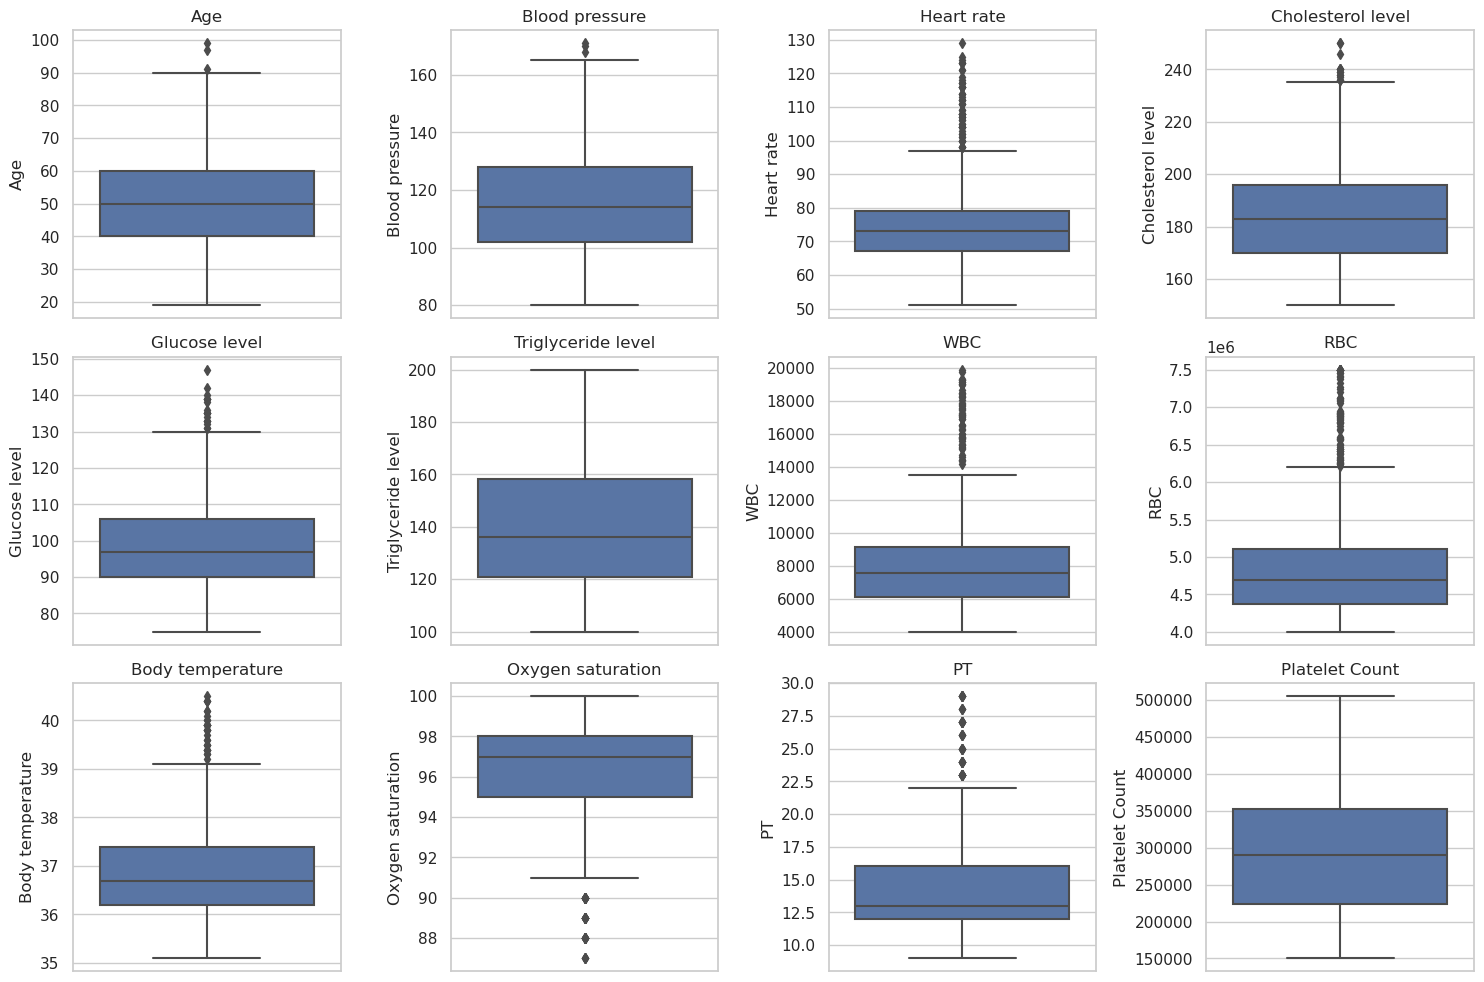

In [12]:
# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Selecting columns for box plots
key_visualization_columns = ['Age', 'Blood pressure', 'Heart rate', 'Cholesterol level', 'Glucose level', 'Triglyceride level', 'WBC','RBC', 'Body temperature', 'Oxygen saturation', 'PT', 'Platelet Count']

# Creating box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_visualization_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

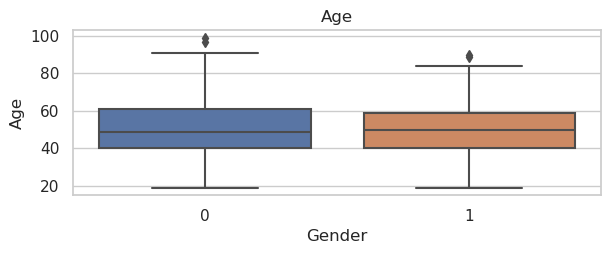

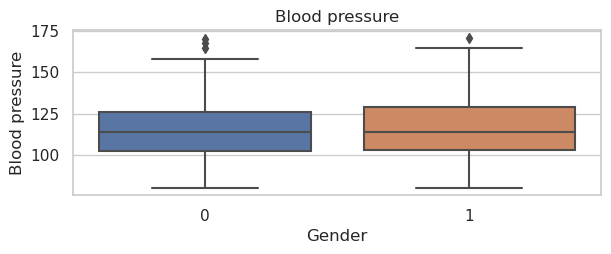

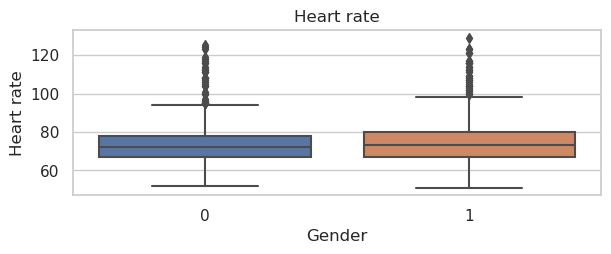

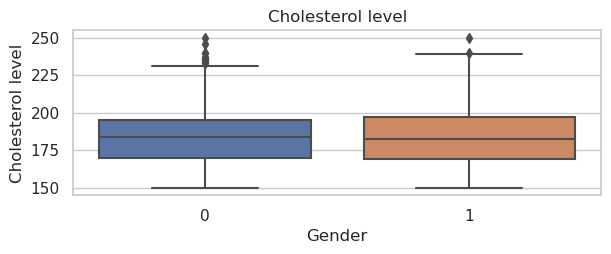

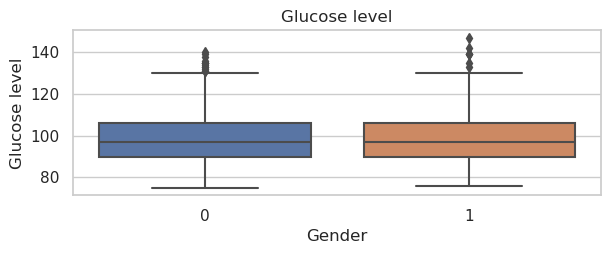

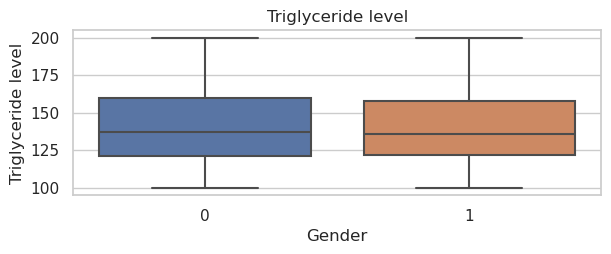

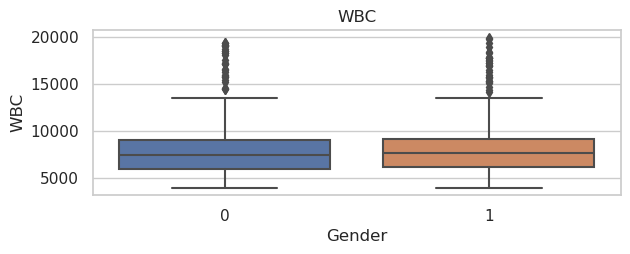

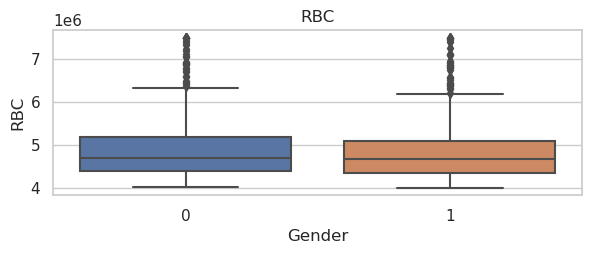

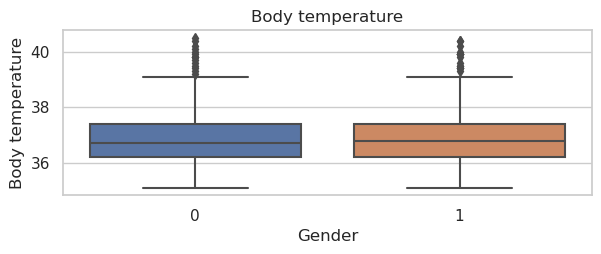

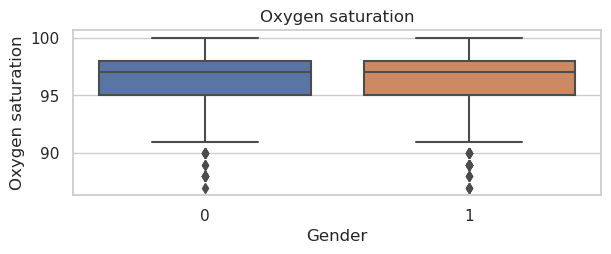

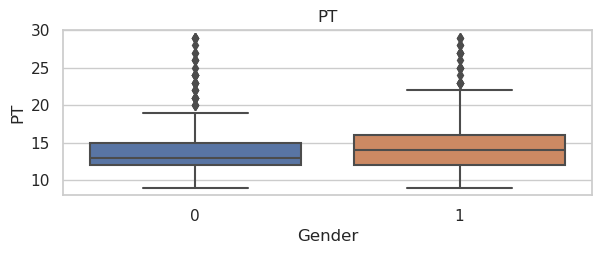

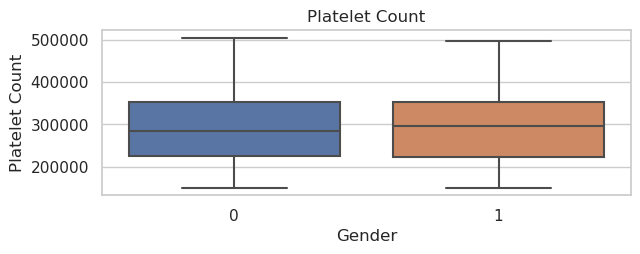

In [13]:
# side-by-side boxplot for the numerical attributes respect to the gender
for i, col in enumerate(key_visualization_columns, 1):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 15))
    plt.subplot(6, 2, i)
    sns.boxplot(x= 'Gender', y=col, data= df)
    plt.title(col)


From the above visualization, we notice that there is barely a small difference of the statistics relatively to the gender, this raises the assumption that the attribute 'Gender' can be removed later if it is confirmed that is doesn't serve the prediction of the target variable

### Outlier Detection and Handling:
In order to do that, we will use the __IQR__ (Inter-Quartile Range) method:

In [14]:
# Stats about the outliers using the IQR method

numerical_columns= ['Glucose level', 'CRP', 'PT', 'Cholesterol level', 'Triglyceride level', 'Blood pressure', 'Heart rate', 'Body temperature', 'Oxygen saturation','WBC', 'RBC', 'Platelet Count']

outlier_details = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_details[col] = {
    'count': outlier_data.shape[0],
    'percentage': (outlier_data.shape[0] / df.shape[0]) * 100,
    'mean': outlier_data[col].mean(),
    'median': outlier_data[col].median(),
    'min': outlier_data[col].min(),
    'max': outlier_data[col].max()}



#
outlier_stats_df = pd.DataFrame(outlier_details)

#
print(outlier_stats_df)

            Glucose level         CRP         PT  Cholesterol level  \
count                20.0  101.000000  43.000000          13.000000   
percentage            2.5   12.625000   5.375000           1.625000   
mean                136.3   17.316832  25.511628         240.692308   
median              135.0   16.300000  25.000000         239.000000   
min                 131.0    9.500000  23.000000         236.000000   
max                 147.0   34.300000  29.000000         250.000000   

            Triglyceride level  Blood pressure  Heart rate  Body temperature  \
count                      0.0        3.000000       60.00              32.0   
percentage                 0.0        0.375000        7.50               4.0   
mean                       NaN      169.666667      110.05              39.8   
median                     NaN      170.000000      108.50              39.8   
min                        NaN      168.000000       98.00              39.2   
max                   

### Outlier Visualization:

This __violin plot__ approach, alongside the particular column in the variable `key_medical_columns`, were professional recommendations.

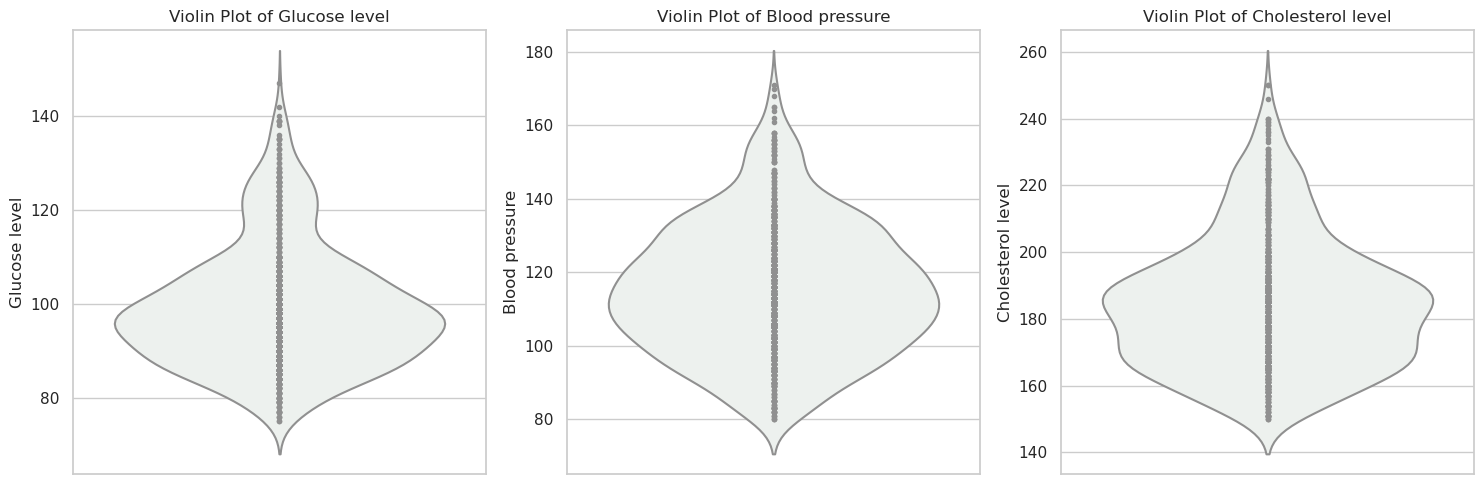

In [15]:
# Visualizing outliers with violin plots for a more detailed view
key_medical_columns = ['Glucose level', 'Blood pressure', 'Cholesterol level']

plt.figure(figsize=(15, 5))
for i, col in enumerate(key_medical_columns, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=df[col], inner="point", palette="light:g")
    plt.title(f"Violin Plot of {col}")

plt.tight_layout()
plt.show()


* __Analysis:__ We see that this method of identifying the outliers classifies the extreme cases as outliers where actually they are not, these cases are what interests doctors the most since they represent severe cases that need special treatments. Since doctors do not recommend the remove of the outliers we need to set some confitions on the chosen moden form later training (The need of a model that is not that sensitive to outliers)

### Visualizing Binary Data Against Request Service:

Using grouped bar charts for binary features such as `'Diabetes'` and `'Heart disease'`, we can see how the presence/absence of said features impacts the `'service request'`, our target variable.
We'll start by encoding the values of `Service request` column using `sklearn.preprocessing.LabelEncoder`:

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical data for visualization
label_encoder = LabelEncoder()
df['Service request'] = label_encoder.fit_transform(df['Service request'])

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Cardiology': 0,
 'General Medicine': 1,
 'Internal Medicine': 2,
 'Nursing Care': 3,
 'Pneumology': 4}

Since, we will be working using __Random Forest__ (for the reasons we will present later), the encoding of the service request as a scale from 0 to 4 will not affect the decision of the model. This is because **Random Forest**, and **decision tree-based models** in general, are inherently suited for handling categorical data and do not assume a natural ordering in the target variable when used for classification tasks.

Then we can visualize, `pandas.crosstab` (cross tabulation, a.k.a. contingency) method, which measures the frequency count of each unique value in the column `disease` against each unique value in the `Service Request` column.:

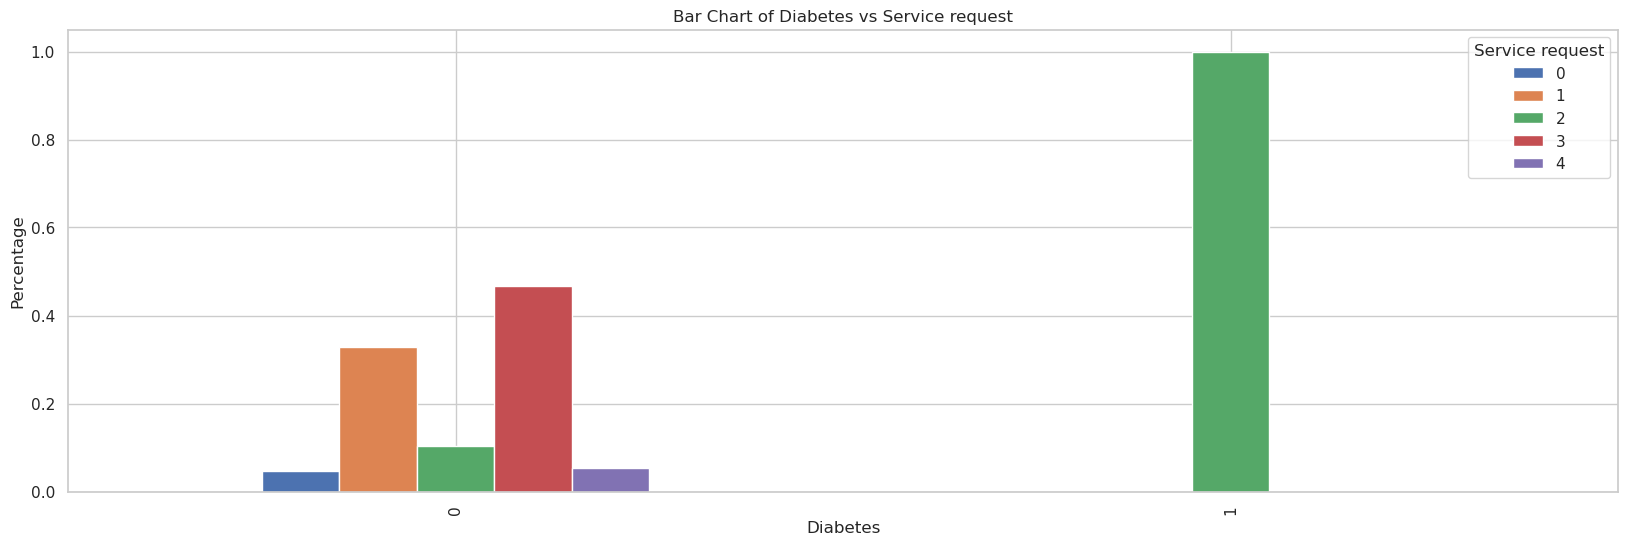

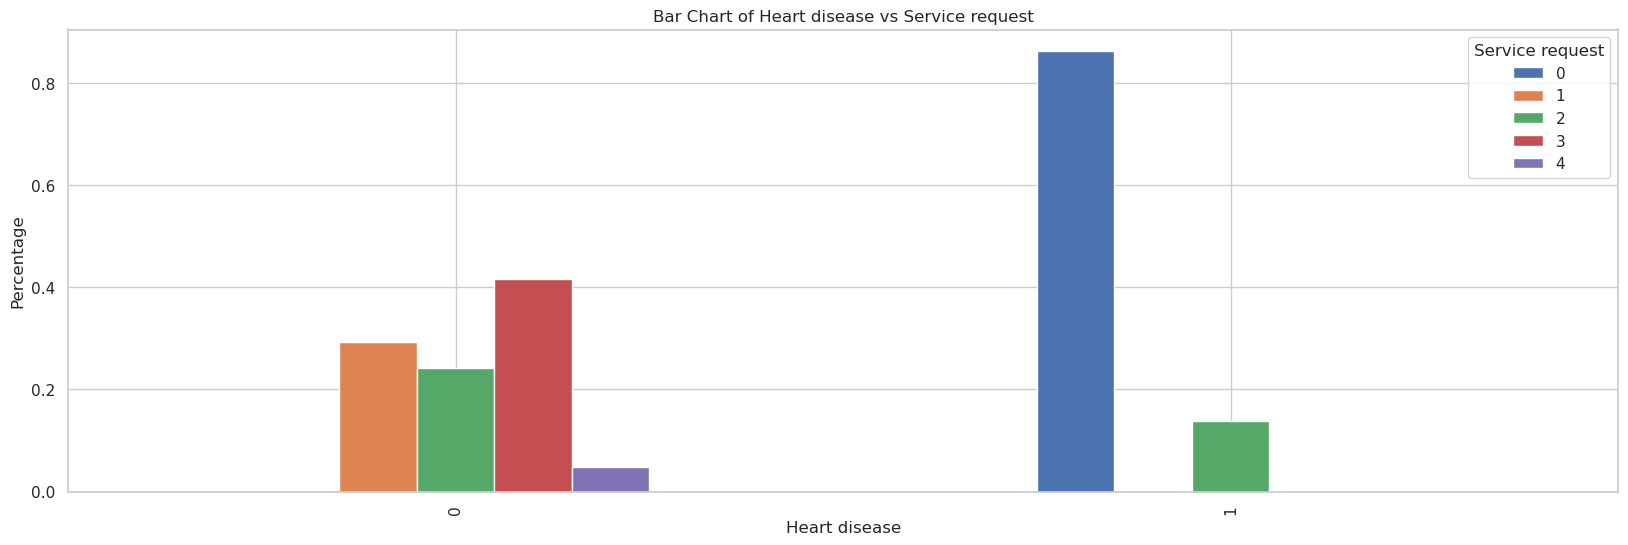

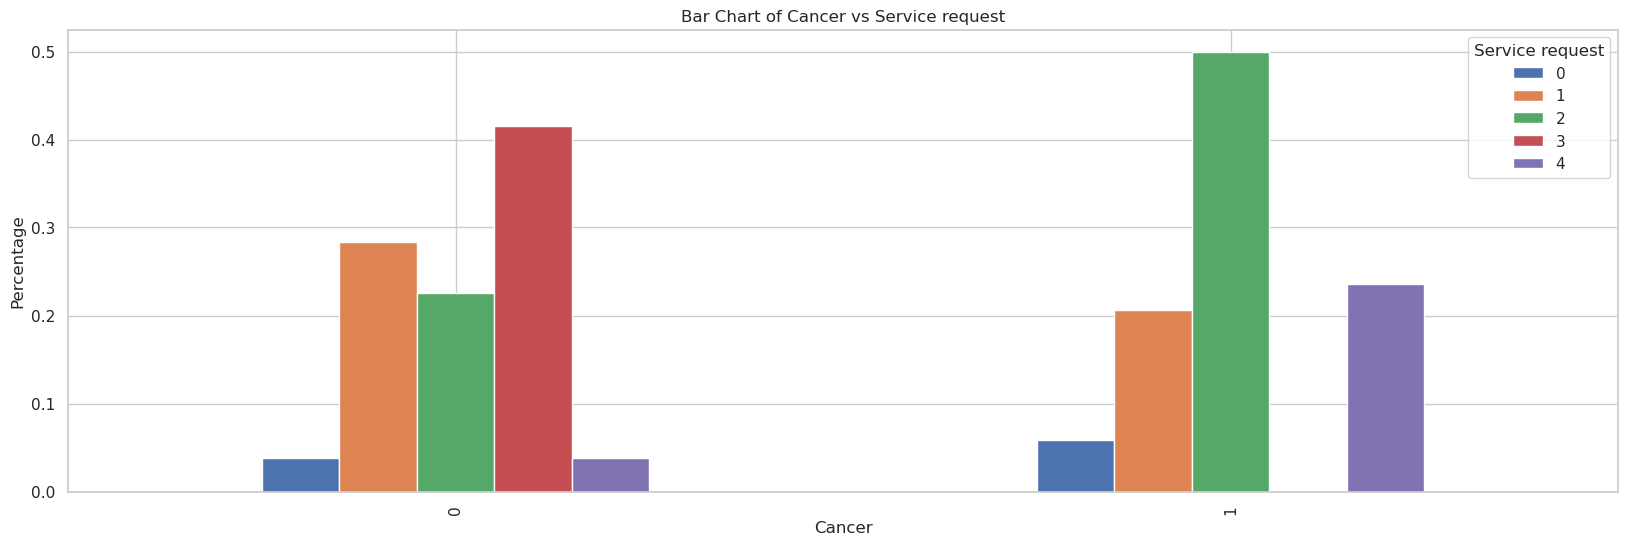

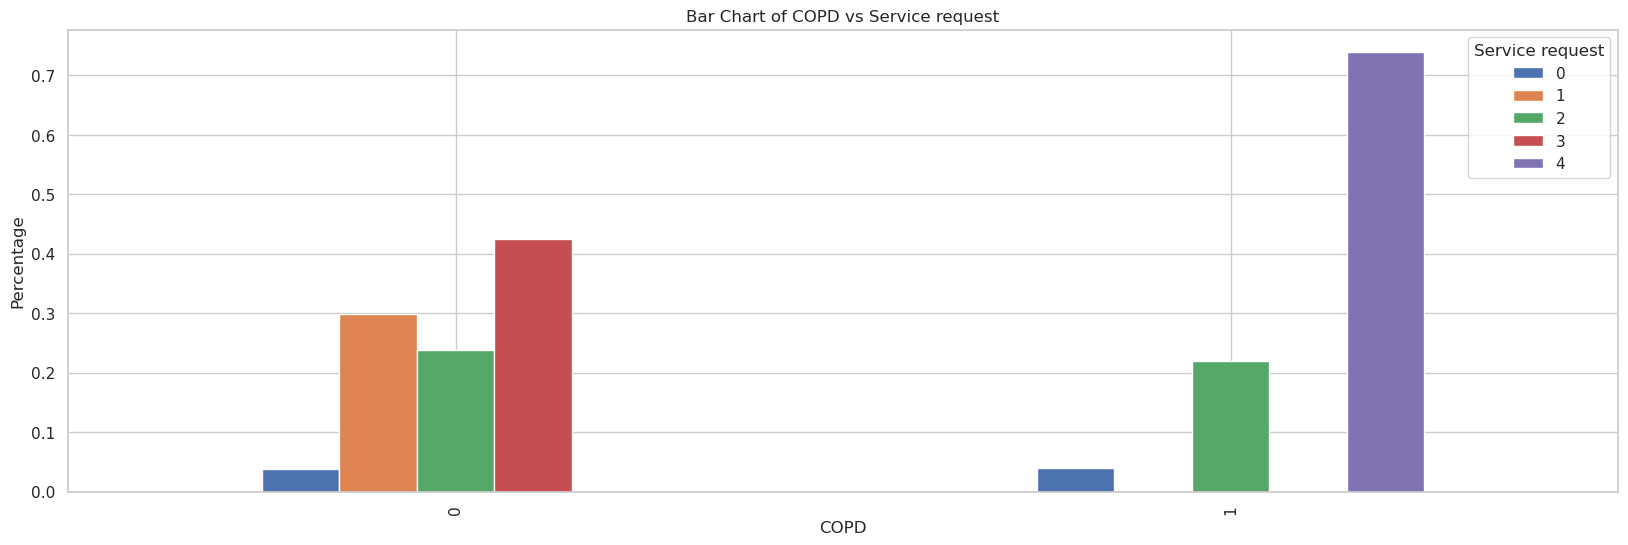

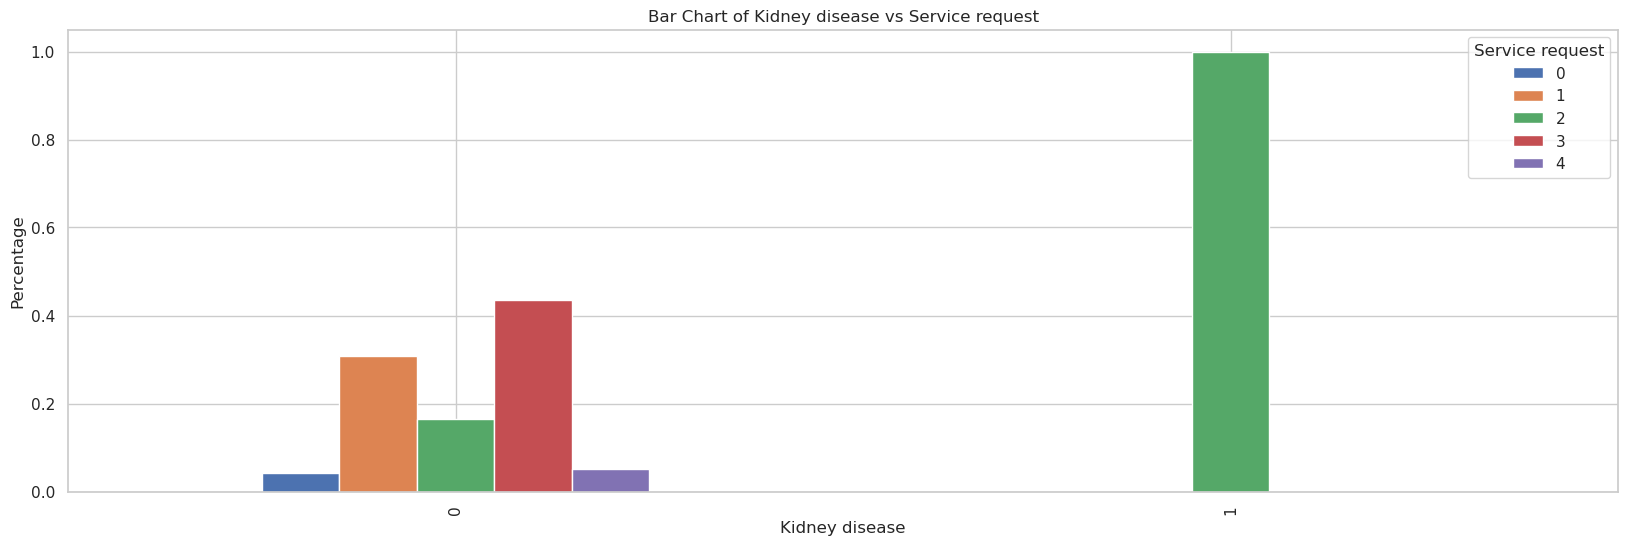

In [17]:
for disease in binary_columns:
    crosstab = pd.crosstab(df[disease], df['Service request'], normalize='index')
    crosstab.plot(kind='bar', stacked=False, figsize=(20, 6))
    plt.title(f'Bar Chart of {disease} vs Service request')
    plt.ylabel('Percentage')
    plt.xlabel(disease)
    plt.show()

* __Analysis:__ We can see intersting patterns arise. In the first chart, we can see that 100% of patients with `Diabetes`, as well as 100% of patients with `Kidney Disease` all requested service 2, which corresponds to `Internal Medicine`.
- Also, we can estimate a significant relationship between the diseases and the target variable, this raises the probability of selecting those particular attributes later when doing feature selection. Further analysis will confirm or deny this assumption.

## __IV. Data Mining Techniques__

### __Dimesionality Reduction__:

Due to the nature of this dataset, especially the fact it has 25 feature columns, and since we would still like to see interesting relationships between the actual features and the target variable, we opted to go with a __feature selection__ approach, rather than feature extraction.

#### Data Correlation Heatmap for Key Columns:

Once again, we will focus on the columns from `key_visualization_columns` variable defined above.
We will chaeck the linear correlation to check whether we can use PCA algorithm

<Axes: >

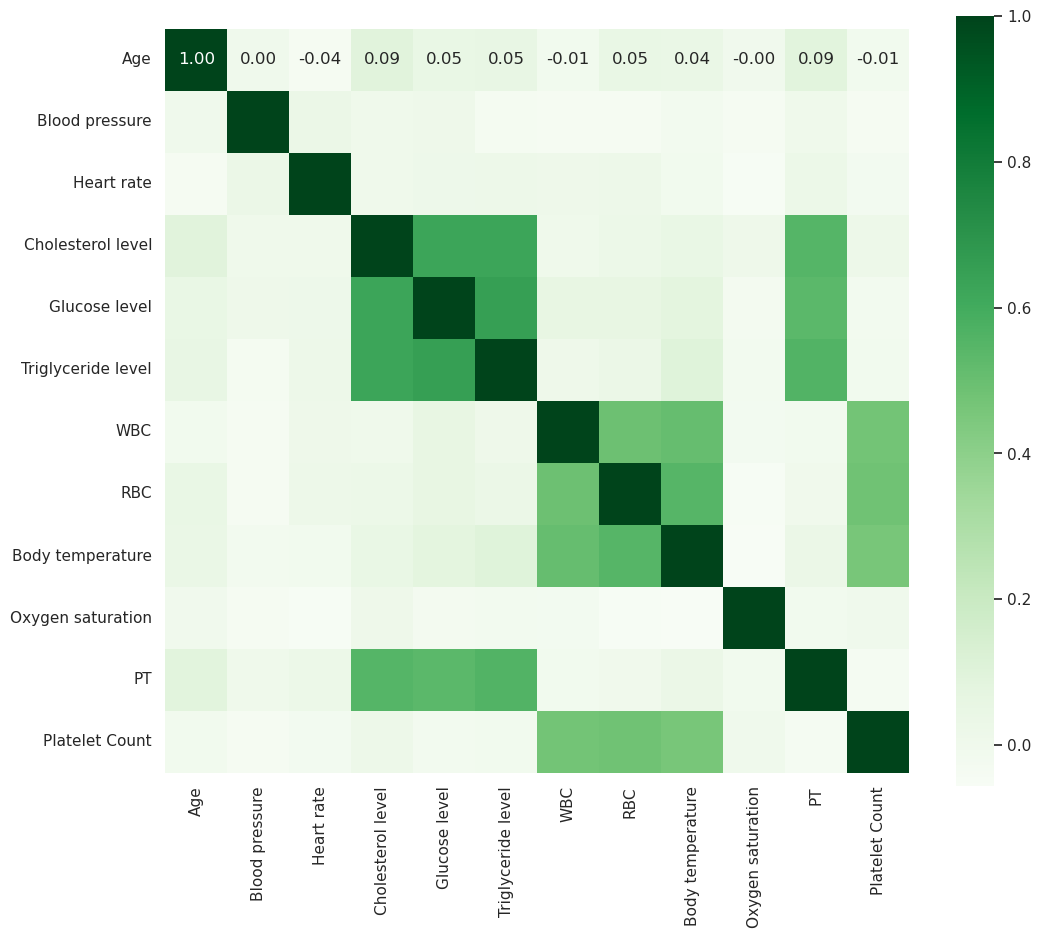

In [18]:
plt.figure(figsize=(12, 10))

sns.heatmap(df[key_visualization_columns].corr(), annot=True,
            fmt=".2f", cmap='Greens', square=True)


* __Analysis:__ Here we can notice that there is very little correlation between those key feature columns, making dimentionality reduction potentially costly in terms of lost variance. So, we will not use PCA for this dataset

#### Feature Selection
We will use the Chi-2 feature selection technique

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

print(df.head())

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop(['Service request'], axis=1))
print(df_encoded.columns)

# Scale the data to make it suitable for chi-squared test
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Split the data into features and target variable
X = df_scaled
y = df['Service request']

   ID  Age  Gender  Service Time  Diabetes  Hypertension  Heart disease  \
0   1   69       1            25         0             1              0   
1   2   53       1            20         0             1              0   
2   3   67       0            25         1             0              0   
3   4   50       1            20         0             1              0   
4   5   73       0            15         0             0              0   

   Cancer  COPD  Kidney disease  ...  Blood pressure  Heart rate  \
0       0     0               0  ...             138          78   
1       0     0               0  ...             131          70   
2       0     0               0  ...             118          55   
3       0     0               0  ...             135          82   
4       0     0               0  ...             113          59   

   Body temperature  Oxygen saturation  Pain level  Medication adherence  \
0              35.6                 91           0              

In [20]:
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Apply SelectKBest class to extract top 'k' best features
bestfeatures = SelectKBest(score_func=chi2, k='all') # You can change k to the number of top features you want
fit = bestfeatures.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_encoded.columns)

# Concatenate two dataframes for better visualization and print them
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(15, 'Score')) # change k to the number of top features you want to see


                 Feature       Score
6          Heart disease  655.812865
8                   COPD  554.253990
4               Diabetes  385.263158
9         Kidney disease  224.736842
12                    PT   54.909835
7                 Cancer   50.672109
19            Pain level   34.432384
14    Triglyceride level   34.313815
5           Hypertension   24.311305
20  Medication adherence   22.324833
21                   WBC   19.629757
10         Glucose level   18.694279
11                   CRP   17.913229
16            Heart rate   17.740615
13     Cholesterol level   14.258360


The above assumptions raised from the analysis: 
- The diseases are highly related with our target variable
- Gender does not give further information to the dataset
- ...
<br>
Are all __confirmed__ through this test. Now we need to specify the number of selected features 

## __V. Model Building__

Using `featureScores` above, we can start selecting the optimal features for our model: 

In [21]:
selected_cols = featureScores.sort_values(by = 'Score', ascending= False)['Feature'].to_list()
selected_cols

['Heart disease',
 'COPD',
 'Diabetes',
 'Kidney disease',
 'PT',
 'Cancer',
 'Pain level',
 'Triglyceride level',
 'Hypertension',
 'Medication adherence',
 'WBC',
 'Glucose level',
 'CRP',
 'Heart rate',
 'Cholesterol level',
 'RBC',
 'Platelet Count',
 'Body temperature',
 'Blood pressure',
 'Oxygen saturation',
 'Age',
 'Gender',
 'ID',
 'Service Time']

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df[selected_cols]
y = df['Service request']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Before we start training our model, we will generate a __Learning Curve__ graph to find the optimal number of features (columns) to train our model:

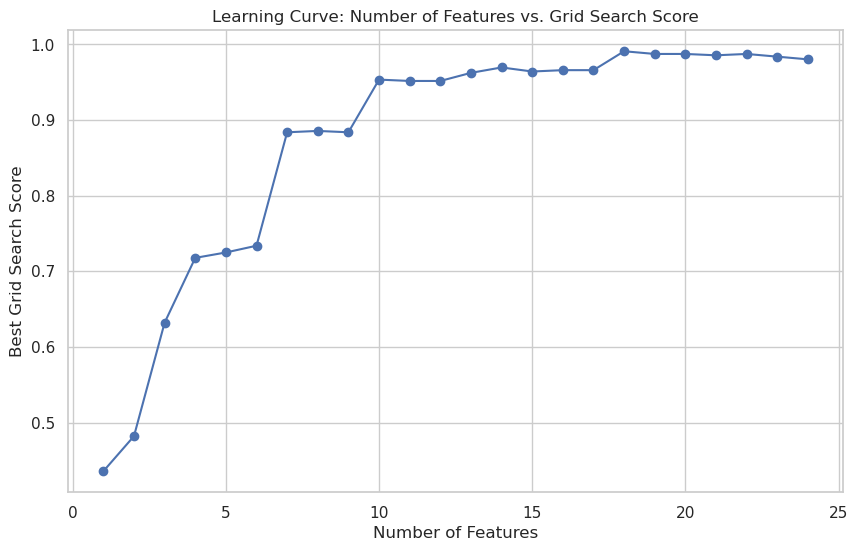

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_only_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Grid search parameters for the Random Forest classifier
param_grid_rf_only = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['log2', 'sqrt'],
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Function to run grid search with different numbers of features
def grid_search_with_feature_subset(n_features, X_train, y_train, param_grid):
    # Select top N features
    X_train_subset = X_train.iloc[:, :n_features]

    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

    # Fit the grid search
    grid_search.fit(X_train_subset, y_train)

    return grid_search.best_score_, grid_search.best_params_

# Range of features to test
feature_range = range(1, len(selected_cols) + 1)

# Store the results
results = []
best_params = []

# Iterate over feature range and run grid search
for n_features in feature_range:
    best_score, best_param = grid_search_with_feature_subset(n_features, X_train, y_train, param_grid_rf_only)
    results.append(best_score)
    best_params.append(best_param)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(feature_range, results, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Best Grid Search Score')
plt.title('Learning Curve: Number of Features vs. Grid Search Score')
plt.grid(True)
plt.show()


From this curve, we can see that taking the first 10 features would yield a sufficiently high accuracy, thus __avoiding potential overfitting__ while using the fewest number of features possible.

We now can move on to selecting the top 10 features and training the model:

In [24]:
chosen_cols = selected_cols[:10]
X_final = df[chosen_cols]
y_final = df['Service request']
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42, stratify=y)
X_final.head()

,Heart disease,COPD,Diabetes,Kidney disease,PT,Cancer,Pain level,Triglyceride level,Hypertension,Medication adherence
0,0,0,0,0,15,0,0,101,1,1
1,0,0,0,0,12,0,1,111,1,1
2,0,0,1,0,24,0,0,200,0,1
3,0,0,0,0,16,0,1,172,1,1
4,0,0,0,0,14,0,1,126,0,1


We will start by instanciating the model using `sklearn.ensemble.RandomForestClassifier`.
<br><br>
The performance of a model significantly depends on the value of its hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values.<br>
<u>__GridSearch Cross Validation__</u> is the process of performing _**hyperparameter tuning**_ in order to determine the optimal values for a given model.

We can use `sklearn.model_selection.GridSearchCV` to implement it.

In our case, we will go with `cv=8`, which means Grid Search will fold the dataset 8 times for its cross validation, each fold containing about 100 rows, as follows:

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Assuming X_train and y_train are your training data and labels

# Define the pipeline with only the Random Forest classifier
rf_only_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Grid search parameters for the Random Forest classifier
param_grid_rf_only = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['log2', 'sqrt'],
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object for the Random Forest classifier pipeline
grid_search_rf_only = GridSearchCV(rf_only_pipeline, param_grid_rf_only, cv=8, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf_only.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [4, 6, 8],
                         'classifier__max_features': ['log2', 'sqrt'],
                         'classifier__n_estimators': [100, 200]})

* __Random Forest hyperparameters:__

    -`'classifier__n_estimators'`: Number of decision trees in the forest.<br>
    -`'classifier__max_features'`: The maximum number of features that are considered for splitting a node in the decision trees of the Random Forest.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-`sqrt`: Square root of the total number of features <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-`log2`: Log base 2 of the total number of features <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-`None`: Uses all the features <br>
    -`'classifier__max_depth'`: The maximum depth of each tree. Typical values are `[4, 6, 8]`.<br>
    -`'classifier__criterion'`: The function used to meaesure the quality of the split.<br>

As seen above, __GridSearchCV__ is provided with multiple values for the hyperparameters. It conducts it search to determine the best option for each hyperparameter. 

Once done, we can retrieve the best hyperparameters as seen below:

In [26]:
grid_search_rf_only.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 100}

## __VI. Analysis and Evaluation__

### __Feature Importance:__

At each node in these trees, the algorithm selects the best split among a random subset of features. The __*importance*__ of a feature is measured by
 __how much this feature contributes to improving the split__, often quantified in terms of *reduction in impurity* or *increase in purity.*

In [27]:
best_model = grid_search_rf_only.best_estimator_
rf_classifier = best_model.named_steps['classifier']
importances = rf_classifier.feature_importances_
features_importances = pd.Series(importances, index= X_train.columns).sort_values(ascending=False)
features_importances

Diabetes                0.172116
Kidney disease          0.167945
Pain level              0.156483
PT                      0.123433
COPD                    0.121030
Heart disease           0.105366
Medication adherence    0.082811
Triglyceride level      0.043110
Hypertension            0.020742
Cancer                  0.006965
dtype: float64

* __Analysis:__
    * __Correlation vs. Causation:__ Feature importance in RandomForest indicates correlation, not causation. A feature might be 
important because it's correlated with the target variable, but this doesn't mean it causes the target variable to change.

### __Evaluation Metrics:__

In order to evaluate our model, we use `precision_score`, `accuracy_score`, and `recall_score` from `sklearn.metrics` to assess our __Random Forest__ model's performance. Accuracy provides an overall success rate, while precision and recall offer class-wise correctness, with slight differences between the two. The code applies the model to the test set, calculates these metrics, and prints them, offering a concise evaluation of the model's effectiveness in predictions.

##### __Accuracy:__

In [28]:
from sklearn.metrics import precision_score, accuracy_score, recall_score
predictions = grid_search_rf_only.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print(f' Accuracy : {accuracy}')

 Accuracy : 0.975


To calculate the accuracy, we only need to know which predictions were correct and which were not. Accuracy is “blind” to specific classes. it disregards class balance and the cost of different errors. This a drawback of accuracy as an evaluation metric. Therefore, we need other metrics, for which we will use *__precision__* and __*recall*__.

#### __Precision and Recall:__

In the first case, we calculate the precision and recall for each class individually. This way, we can get multiple metrics based on the number of classes in our dataset.
In the second case, we "average" precision and recall across all the classes to get a single number.Different methods can be used to average the precision, such as __macro averaging__ (non weighted classes).

In [29]:
#Precisions
precisions = precision_score(y_true=y_test, y_pred=predictions, average=None)
print(f'Precisons : {[float(f"{p:.2f}") for p in precisions]}')

#Precisions average
precision_avg = precision_score(y_true=y_test, y_pred=predictions, average='macro')
print(f'Average Precison : {precision_avg}')

#Recalls
recalls = recall_score(y_true=y_test, y_pred=predictions, average=None)
print(f'Recalls : {[float(f"{r:.2f}") for r in recalls]}')

#Recalls average
recall_avg = recall_score(y_true=y_test, y_pred=predictions, average='macro')
print(f'Average Recall : {np.array(recall_avg)}')

Precisons : [1.0, 1.0, 1.0, 0.94, 1.0]
Average Precison : 0.9882352941176471
Recalls : [1.0, 0.91, 1.0, 1.0, 1.0]
Average Recall : 0.982089552238806


* __Analysis:__ An accuracy of over __*97%*__, average precision of over __*98%*__, and an average recall of more than __*98%*__ are potential indicators of __*overfitting*__.<br><br>
In spite of our attempts at applying the various data mining tecniques, as well as the careful choice of the most appropriate classifier model __(Random Forest)__ least prone to overfitting, this overfitting can be attributed solely to the fact that our dataset only has only about 800 entries, which is not nearly sufficient for a proper data machine learning application.<br><br>

## __VII. Conclusion__

* __*In summary*__,

Throughout this notebook, we meticulously explored and applied various data mining techniques to our health-related dataset, comprising of approximately 800 real data entries. Our journey began with a thorough __data exploration and preprocessing__ phase, where we addressed <u>*missing values*</u>, <u>*outliers*</u>, <u>*standardized categorical data*</u>, and <u>*visualized key features*</u> to understand their distribution and relationships.

We then delved into <b>*dimensionality reduction*</b>, opting for a <b>*feature selection*</b> approach due to the minimal correlation observed among key features.

Then we moved to the <b>*model building*</b> phase, where we opted for a <u>*Random Forest Classifier*</u>, meticulously tuning its hyperparameters using *__GridSearchCV__*. Despite our efforts to minimize *overfitting*, the model's extremely high accuracy and precision metrics suggested a tendency towards overfitting, likely due to the limited size of our dataset.

The *__evaluation metrics__*: <u>*precision*</u>, <u>*accuracy*</u>, and <u>*recall*</u>, provided a comprehensive assessment of our model. However, they also exposed the problems with trying to build a well-generalized model with a relatively small dataset.

Overall, this project has not only provided a practical application of various data mining techniques but also offered valuable lessons in the interpretation of data and model results. The model built in the end could have very importnant and significant applications in the medical field, especially during the hard times in the peaks of pandemics. The principal goal was to make __*home hospitalization*__ a reality, with the aim of freeing as many hospital beds as possible for patients in critical conditions. It is safe to say that such a model, if applied properly, *__would doubtlessly save precious lives__*.

<h2><b><u>*ANONYMOUS* Team Members:</u></b></h2>

* __Maab Chaoui__, *Leader*
* __Mohamed Benabdelouahad__
* __Ahmed Djalal Hacini__
* __Meriem Mebarek Mansouri__